In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("energy consumption.csv")

In [3]:
data.shape

(969, 2)

In [4]:
data['DATE'] = pd.to_datetime(data['DATE'],format='%m/%Y')

data.index = data['DATE']

In [5]:
train_data = data[0:678]
valid_data =data[678:969]

In [36]:
valid_data

,DATE,ENERGY_INDEX,Holt_Winter
DATE,,,
1995-07-01,1995-07-01,86.2425,81.079289
1995-08-01,1995-08-01,89.8063,85.960281
1995-09-01,1995-09-01,78.7442,84.721281
1995-10-01,1995-10-01,73.9353,82.886508
1995-11-01,1995-11-01,79.8903,77.997123
...,...,...,...
2019-05-01,2019-05-01,91.9046,105.001659
2019-06-01,2019-06-01,98.4397,109.628802
2019-07-01,2019-07-01,112.9469,116.191391


In [6]:
train_data.head()

,DATE,ENERGY_INDEX
DATE,,
1939-01-01,1939-01-01,3.3842
1939-02-01,1939-02-01,3.4100
1939-03-01,1939-03-01,3.4875
1939-04-01,1939-04-01,3.5133
1939-05-01,1939-05-01,3.5133


In [7]:
from statsmodels.tsa.api import ExponentialSmoothing

In [8]:
model = ExponentialSmoothing(np.asarray(train_data['ENERGY_INDEX']) ,seasonal_periods=7 ,trend='add', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.15, smoothing_slope=0.1, smoothing_seasonal=0.45) #

valid_data['Holt_Winter'] = fit1.forecast(len(valid_data)) 

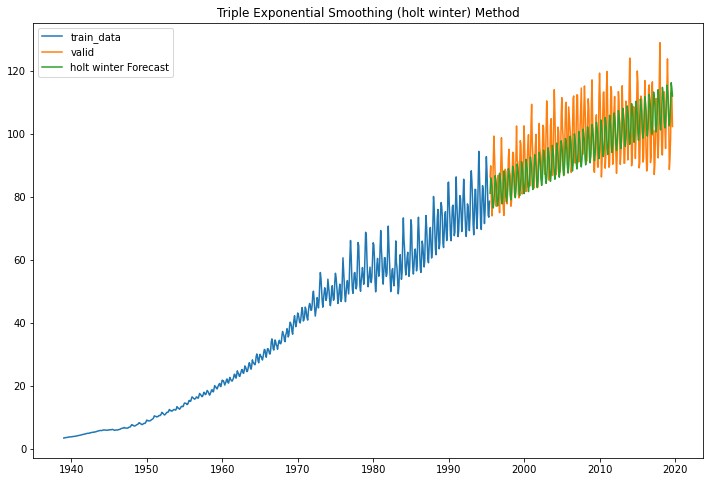

In [9]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [10]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 10.476403540240538


In [11]:
model.params

{'smoothing_level': 0.15,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': 0.45,
 'damping_trend': nan,
 'initial_level': 3.422137290729128,
 'initial_trend': 0.03526962558797993,
 'initial_seasons': array([0.97799736, 0.981514  , 0.9837487 , 0.98294488, 0.97578255,
        0.97796822, 0.9756858 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [12]:
Test_Data = pd.date_range(start="2019-10-19", periods=36, freq='1M')

In [13]:
Test_Data_pred = pd.DataFrame(Test_Data, columns = (['Date']))


In [14]:
Test_Data_pred.head()

,Date
0,2019-10-31
1,2019-11-30
2,2019-12-31
3,2020-01-31
4,2020-02-29


In [15]:
Test_Data_pred['Date'] = pd.to_datetime(Test_Data_pred['Date'],format='%Y-%m-%d')

Test_Data_pred.index = Test_Data_pred['Date']

In [16]:
model = ExponentialSmoothing(np.asarray(data['ENERGY_INDEX']) ,seasonal_periods=7 ,trend='add', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.1, smoothing_slope=0.1, smoothing_seasonal=0.45) #

Test_Data_pred['Holt_Winter'] = fit1.forecast(len(Test_Data_pred)) 

In [17]:
Test_Data

DatetimeIndex(['2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', freq='M')

In [18]:
Test_Data_pred.head()

,Date,Holt_Winter
Date,,
2019-10-31,2019-10-31,108.678858
2019-11-30,2019-11-30,96.426405
2019-12-31,2019-12-31,96.622330
2020-01-31,2020-01-31,99.578641
2020-02-29,2020-02-29,108.410125


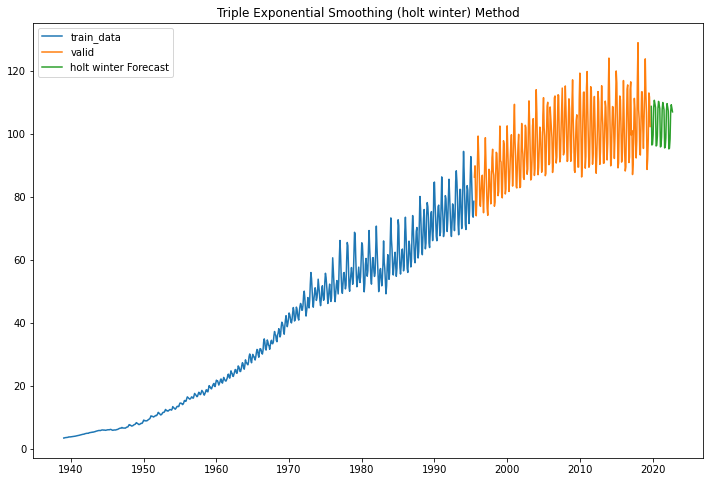

In [22]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(Test_Data_pred['Date'],Test_Data_pred['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [23]:
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

In [24]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [25]:
adf_test(train_data['ENERGY_INDEX'])

Results of Dickey-Fuller Test:
Test Statistic                   1.672144
p-value                          0.998059
#Lags Used                      13.000000
Number of Observations Used    664.000000
Critical Value (1%)             -3.440237
Critical Value (5%)             -2.865903
Critical Value (10%)            -2.569093
dtype: float64


In [26]:
train_data['count_diff'] = train_data['ENERGY_INDEX'] - train_data['ENERGY_INDEX'].shift(1)

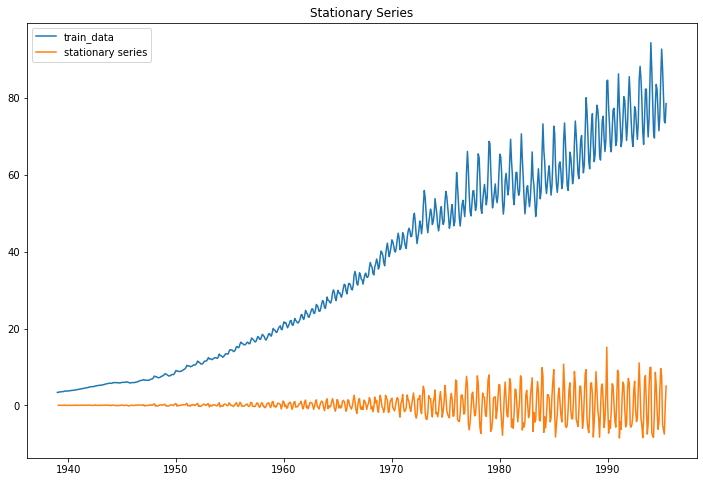

In [27]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(train_data.index,train_data['count_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [28]:
train_data['count_log'] = np.log(train_data['ENERGY_INDEX'])
train_data['count_log_diff'] = train_data['count_log'] - train_data['count_log'].shift(1)

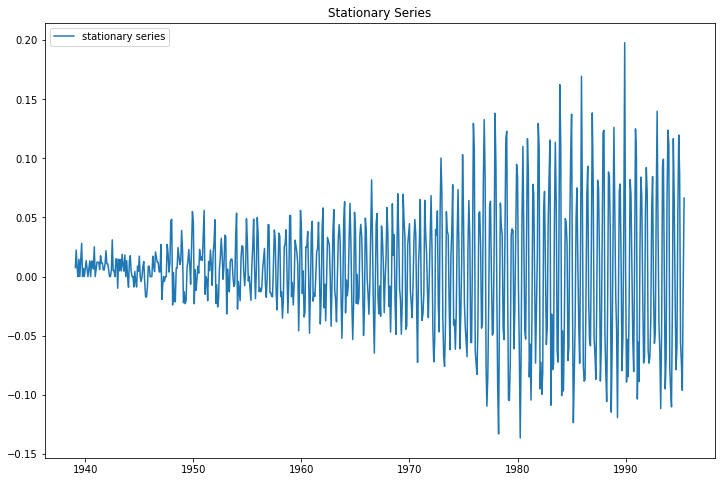

In [29]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index,train_data['count_log_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

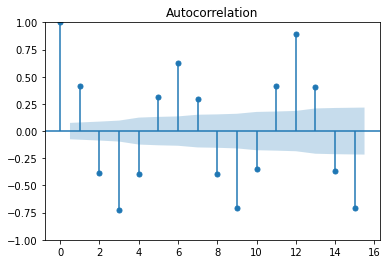

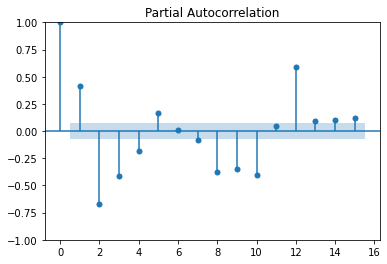

In [31]:
plot_acf(train_data['count_log_diff'].dropna(), lags=15)
plot_pacf(train_data['count_log_diff'].dropna(), lags=15)
plt.show()

In [32]:
from statsmodels.tsa.statespace import sarimax

In [33]:
train_data['count_log'] = np.log(train_data['ENERGY_INDEX'])
train_data['count_log_diff'] = train_data['count_log'] - train_data['count_log'].shift(7)

In [34]:
train_data['count_log_diff'].head(10)

DATE
1939-01-01         NaN
1939-02-01         NaN
1939-03-01         NaN
1939-04-01         NaN
1939-05-01         NaN
1939-06-01         NaN
1939-07-01         NaN
1939-08-01    0.066444
1939-09-01    0.087011
1939-10-01    0.064539
Name: count_log_diff, dtype: float64

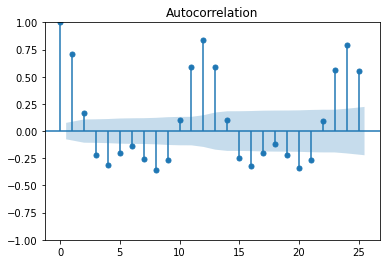

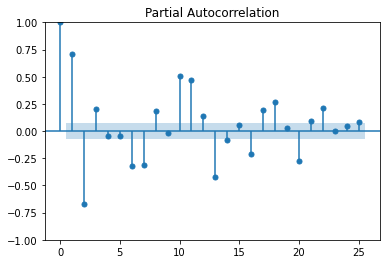

In [35]:
plot_acf(train_data['count_log_diff'].dropna(), lags=25)
plot_pacf(train_data['count_log_diff'].dropna(), lags=25)
plt.show()

In [37]:
valid_data.head

<bound method NDFrame.head of                  DATE  ENERGY_INDEX  Holt_Winter
DATE                                            
1995-07-01 1995-07-01       86.2425    81.079289
1995-08-01 1995-08-01       89.8063    85.960281
1995-09-01 1995-09-01       78.7442    84.721281
1995-10-01 1995-10-01       73.9353    82.886508
1995-11-01 1995-11-01       79.8903    77.997123
...               ...           ...          ...
2019-05-01 2019-05-01       91.9046   105.001659
2019-06-01 2019-06-01       98.4397   109.628802
2019-07-01 2019-07-01      112.9469   116.191391
2019-08-01 2019-08-01      111.6645   114.480185
2019-09-01 2019-09-01      102.2911   111.965346

[291 rows x 3 columns]>

In [70]:
# fit model
model = sarimax.SARIMAX(train_data['count_log'], seasonal_order=(1,1,1,7), order=(4,1,2))
fit1 = model.fit()

# make predictions
valid_data['SARIMA'] = fit1.predict(start="1995-07-01", end="2019-09-01", dynamic=True)

C:\Users\palanil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\palanil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\palanil\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:
valid_data['SARIMA'] = np.exp(valid_data['SARIMA'])

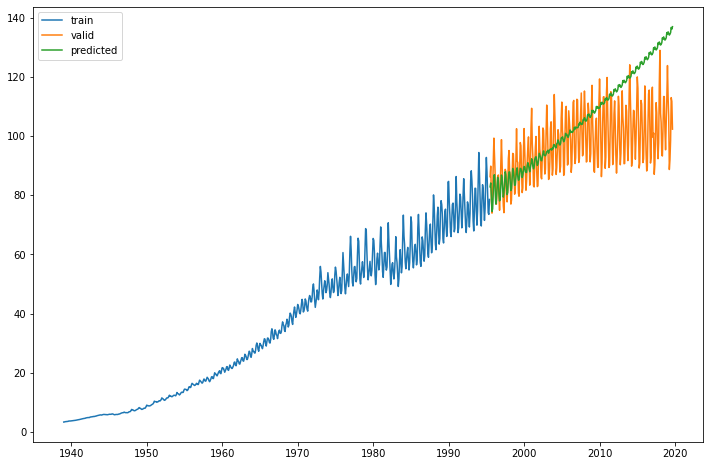

In [72]:
plt.figure(figsize=(12,8))

plt.plot(train_data['ENERGY_INDEX'],  label='train') 
plt.plot(valid_data['ENERGY_INDEX'],  label='valid') 
plt.plot(valid_data['SARIMA'],  label='predicted') 
plt.legend(loc='best') 
plt.show()

In [73]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['SARIMA']))
print('The RMSE value for SARIMA is', rmse)

The RMSE value for SARIMA is 15.823702587263462
